<a href="https://colab.research.google.com/github/mallibus/Unige-DL2019/blob/master/UNIGE_DL_29019_0_IntroDL_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 0. Introduction to Deep Learning

## 0.1 Basics of TensorFlow
<img src="http://mlclass.epizy.com/lab0_images_notebook/tf_logo.png" width="200px"><br>
TensorFlow is an open source machine learning library for research and production.<br>
It offers tools, libraries and resources that makes it easy for you to build and deploy ML models.

### Most important features:
* Easy model building<br>
Build and train ML models easily using intuitive high-level APIs like Keras with eager execution, which makes for immediate model iteration and easy debugging.


* Robust ML production anywhere<br>
Easily train and deploy models in the cloud, on-prem, in the browser, or on-device no matter what language you use.


* Powerful experimentation for research<br>
A simple and flexible architecture to take new ideas from concept to code, to state-of-the-art models, and to publication faster.


### Note
If you cannot see the image in the previous block, click on the following link. <br>
http://mlclass.epizy.com/lab0_images_notebook/tf_logo.png

You will be redirected to an image. Come back and reload this page. You should be able to see the images on this page now.

### Import TensorFlow
In this tutorial is used **version 1.13.1** that is the last stable version released.<br>
Recently version 2.0 is released but is still a preview.

In [0]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.python.client import device_lib
import time, h5py, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: True


### Data representation for neural network
A Tensor consists of a set of primitive values shaped into an array of any number of dimensions.<br>
Similar to NumPy ndarray objects, Tensor objects have a data type and a shape.  <br>
TensorFlow offers a rich library of operations (tf.add, tf.matmul, tf.linalg.inv etc.) that consume and produce Tensors; these operations automatically convert native Python types.<br>
In addition, Tensors can be backed by accelerator memory (like GPU, TPU) and are immutable.<br>

The rank of a tf.Tensor object defines its number of dimensions.

In [0]:
tf.Variable([[0.1,11.2,4.01,3.5] , [0.2,1,22.1,3.12]], tf.float64)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.1 , 11.2 ,  4.01,  3.5 ],
       [ 0.2 ,  1.  , 22.1 ,  3.12]], dtype=float32)>

In [0]:
#RANK 0 (scalar)
#Create tensor of type string with value "hello world!" 
#Create tensor of type int16 with value 17
#Create tensor of type float64 with value 3.14159265359
#Create tensor of type complex64 with value 10.1 - 1.5j

t01 = tf.Variable("hello world!", tf.string)
t02 = tf.Variable(17, tf.int16)
t03 = tf.Variable(3.14159265359, tf.float64)
t04 = tf.Variable(10.1 - 1.5j, tf.complex64)
print("RANK 0\n",t01,"\n",t02,"\n",t03,"\n",t04,"\n")


#RANK 1 (vector)
#Create tensor of type string with value "abba" 
#Create tensor of type float32 with value [6.14, 3.001]
#Create tensor of type int32 with value [1,3,5,7]
#Create tensor of type complex64 with value [10.3 - 4.05j, 3.1 - 2.13j]

t11 = tf.Variable(["abba"], tf.string)
t12 = tf.Variable([6.14, 3.001], tf.float32)
t13 = tf.Variable([1,3,5,7], tf.int32)
t14 = tf.Variable([10.3 - 4.05j, 3.1 - 2.13j], tf.complex64)
print("RANK 1\n",t11,"\n",t12,"\n",t13,"\n",t14,"\n")


#RANK 2 (matrix)
#Create tensor of type int16 with values [7,4] in the first row and [11,1] in the second row 
#Create tensor of type bool with values [False,True] in the first row and [False,True] in the second row 
#Create tensor of type int32 with value [3] in the first row,[2] in the second row,[12] in the third row,[4] in the fourth row
#Create tensor of type float64 with values [0.1,11.2,4.01,3.5] in the first row and [0.2,1,22.1,3.12] in the second row 

t21 = tf.Variable([[7,4],[11,1]], tf.int16)
t22 = tf.Variable([[False,True],[False,True]], tf.bool)
t23 = tf.Variable([[3],[2] ,[12] ,[4]], tf.int32)
t24 = tf.Variable([[0.1,11.2,4.01,3.5] , [0.2,1,22.1,3.12]], tf.float64)
print("RANK 2\n",t21,"\n",t22,"\n",t23,"\n",t24)


RANK 0
 <tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'hello world!'> 
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=17> 
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.1415927> 
 <tf.Variable 'Variable:0' shape=() dtype=complex128, numpy=(10.1-1.5j)> 

RANK 1
 <tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abba'], dtype=object)> 
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([6.14 , 3.001], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 3, 5, 7], dtype=int32)> 
 <tf.Variable 'Variable:0' shape=(2,) dtype=complex128, numpy=array([10.3-4.05j,  3.1-2.13j])> 

RANK 2
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[ 7,  4],
       [11,  1]], dtype=int32)> 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=bool, numpy=
array([[False,  True],
       [False,  True]])> 
 <tf.Variable 'Variable:0' shape=(4, 1) dtype=int32, numpy=
array([[ 3],
       [ 2],
       [12],
      

### Eager execution
TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later.<br>
If you enable eager execution, operations like c = tf.matmul(a, b) are executed immediately.<br>
However, without eager execution enabled, an operation like tf.matmul does not execute immediately, but, instead, builds a fragment of a TensorFlow graph (in TensorFlow 2.0, all operations will be eagerly executed).

In [0]:
a = tf.constant([[2, 8]])     
b = tf.constant([[5],[7]])  
c = tf.matmul(a, b)
print(c)

tf.Tensor([[66]], shape=(1, 1), dtype=int32)


In [0]:
a = tf.constant([[1., 2.]])     
b = tf.constant([[5.],[7.]])
c = tf.constant([[2., 8.]])     
d = tf.constant([[11.],[77.]])


tf.math.log(a+tf.math.square(b*c))/(c-d)

<tf.Tensor: id=24571, shape=(2, 2), dtype=float32, numpy=
array([[-0.51279116, -2.4596694 ],
       [-0.07044271, -0.11668611]], dtype=float32)>

In [0]:
# In TensorFlow, computations can be thought of as graphs;
# try to build a more difficult expression  y=log(a+(b*c)^2)/(c-d)

def graph(a,b,c,d):
    res = y=tf.math.log(a+tf.math.square(b*c))/(c-d)
    return res

In [0]:
a = tf.constant([[1., 2.]])     
b = tf.constant([[5.],[7.]])
c = tf.constant([[2., 8.]])     
d = tf.constant([[11.],[77.]])

# Execute the computation
res = graph(a,b,c,d)
print(res)

tf.Tensor(
[[-0.51279116 -2.4596694 ]
 [-0.07044271 -0.11668611]], shape=(2, 2), dtype=float32)


If you don't enable eager execution at the beginning of the program, you've to build a graph and run operations using a tf.Session.

Example:

a = tf.constant([[2, 8]])  
b = tf.constant([[5],[7]])  
c = tf.matmul(a, b)

with tf.Session() as sess:<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(sess.run(c))


### Graphical Processing Unit (GPU)

The basic architecture of a GPU differs a lot from a CPU; the GPU is optimized for a high computational power and a high throughput.

<img src="http://mlclass.epizy.com/lab0_images_notebook/cpu_gpu.png" width="500px"><br>

The computation of DNNs is a task that fits excellent on a GPU: there is a large amount of parallelism that can
be utilized (the most common kernels are matrix multiply, convolution and functions with no data dependencies at
all).<br>
In TensorFlow, the supported device types are CPU and GPU; you could use also multiple-GPUs.

In [0]:
if tf.test.is_gpu_available():
    print("GPU ",tf.test.gpu_device_name(), " is available\n")
    
# Print list of available devices
print("Devices available:\n\n",device_lib.list_local_devices())

GPU  /device:GPU:0  is available

Devices available:

 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9172689221157610775
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16245512340323369911
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10655429529530931490
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 729225830702021918
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


### Comparison of CPU time and GPU time 
Below there's an example of the computational time required in the different cases to do matrix multiplication.<br>
**What do you expect? Which is faster? Why?**

In [0]:
def measure(x, steps):
    tf.matmul(x, x)
    start = time.time()
    for i in range(steps):
        x = tf.matmul(x, x)
          # tf.matmul can return before completing the matrix multiplication
          # (e.g., can return after enqueing the operation on a CUDA stream).
          # The x.numpy() call below will ensure that all enqueued operations have completed 
          # (and will also copy the result to host memory, so we're including a little more than 
          # just the matmul operation time).
    _ = x.numpy()
    end = time.time()
    return end - start

In [0]:
shape = (1000, 1000)
steps = 200

print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# Run on CPU:
with tf.device("/cpu:0"):
    print("CPU: {} secs".format(measure(tf.random_normal(shape), steps)))

# Run on GPU, if available:
if tf.test.is_gpu_available():
    with tf.device("/gpu:0"):
        print("GPU: {} secs".format(measure(tf.random_normal(shape), steps)))
else:
    print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 6.4302473068237305 secs
GPU: 0.2633204460144043 secs


### Automatic Differentiation
Automatic differentiation is a technique for optimizing machine learning models.<br>
On simple terms, it is a way of automatically computing the derivatives of the output of a function using the **Chain Rule**   (https://en.wikipedia.org/wiki/Chain_rule ).<br>
Almost every function can be computed as a composition of simple functions which have simple derivatives; consequently, you can compute the derivative of any function that can be written as composition of simpler functions.<br>
Tensorflow uses **Reverse Mode Differentiation**.


#### Here you can find a quick explanation on how backpropagation work https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

TensorFlow provides the tf.GradientTape API that allow to compute the gradient of a computation w.r.t. its input variables.

In [0]:
# Compute the first derivative of function y=x^3 at x=2
x = tf.constant(2.0)

with tf.GradientTape() as g:
    g.watch(x)
    y = tf.pow(x,3)
    
dy_dx = g.gradient(y, x) 
print(dy_dx)

tf.Tensor(12.0, shape=(), dtype=float32)


By default, the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called.<br>
To compute multiple gradients over the same computation,you have to create a persistent gradient tape.<br>
This allows multiple calls to the gradient() method as resources are released when the tape object is garbage collected.

In [0]:
x = tf.constant(3.0)
y = x ** 2
y ** 2

<tf.Tensor: id=25033, shape=(), dtype=float32, numpy=81.0>

In [0]:
# Compute the first and second derivative of function y=x^4 at x=3
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x ** 2
    z = y ** 2

dz_dx = g.gradient(z, x)  # first derivative
dy_dx = g.gradient(y, x) # second derivative
print(dz_dx,dy_dx)
del g  # Drop the reference to the tape

tf.Tensor(108.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)


### Keras
<img src="http://mlclass.epizy.com/lab0_images_notebook/keras.png" width="300px"><br>

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br>
### Most important features:
* User friendliness
* Modularity
* Easy extensibility

### Build a Single Layer Perceptron
Let's build a single layer perceptron composed by one dense layer.

<img src="http://mlclass.epizy.com/lab0_images_notebook/simple_nn.png" width="500px"><br>


In [0]:
tf.constant([[1.,2.]]) @ tf.constant([[1.],[2.]])

<tf.Tensor: id=25118, shape=(1, 1), dtype=float32, numpy=array([[5.]], dtype=float32)>

In [0]:
x = tf.constant([[1.,2.]])
W = tf.constant([[1.,1.]])
b = tf.constant(1.)

tf.sigmoid(tf.tensordot(W,x,(1,1))+b)

<tf.Tensor: id=25135, shape=(1, 1), dtype=float32, numpy=array([[0.98201376]], dtype=float32)>

In [0]:
def one_dense_layer(x, n_in, n_out):
  
    # n_in: number of inputs, n_out: number of outputs
    # y = sigmoid(W*x + b)
    # W = [1,1]
    # b = 1
    
  #x = tf.constant([[1.,2.]], shape=(1,2))
  W = tf.constant([[1.,1.]])
  b = tf.constant(1.)
    
  out =  tf.sigmoid(tf.tensordot(W,x,(1,1))+b)
  return out

In [0]:
x_input = tf.constant([[1,2.]], shape=(1,2))

n_in = 2
n_out = 2

res = one_dense_layer(x_input,n_in,n_out)
print(res)

tf.Tensor([[0.98201376]], shape=(1, 1), dtype=float32)


### Build the same Single Layer Perceptron with Keras

In [0]:
n_input_nodes = 2
n_output_nodes = 2

model = tf.keras.Sequential()

tf.keras.layers.Dense(n_output_nodes, activation='sigmoid', 
                      use_bias=True, kernel_initializer='ones', 
                      bias_initializer='ones',
                      input_shape=(n_input_nodes,))


In [0]:
# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 2

# First define the model 
model = tf.keras.Sequential() # model lets us define a linear stack of network layers.

# define a single fully connected network layer
# look at https://keras.io/layers/core/ to see which parameters takes as input
dense_layer = tf.keras.layers.Dense(n_output_nodes, 
                                    activation='sigmoid', 
                                    use_bias=True, 
                                    kernel_initializer='ones', 
                                    bias_initializer='ones',
                                    input_shape=(n_input_nodes,))

# Add the dense layer to the model using add() function
model.add(dense_layer)

In [0]:
# Test model
x_input = tf.constant([[1.,2.]], shape=(1,2))
print(model(x_input))

tf.Tensor([[0.98201376 0.98201376]], shape=(1, 2), dtype=float32)


In [0]:
# Compare the results obtained
print(tf.reduce_all(tf.equal(model(x_input),one_dense_layer(x_input, n_in=n_in, n_out=n_out))))

tf.Tensor(True, shape=(), dtype=bool)


### Build a Multilayer perceptron
Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer.

<img src="http://mlclass.epizy.com/lab0_images_notebook/mlp.png" width="500px"><br>

Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.

In [0]:
# Generate dummy data
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

units = 32
input_dim = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units, 
                                    activation='relu', 
                                    use_bias=True, 
                                    input_shape=(input_dim,)))

model.add(tf.keras.layers.Dense(units, 
                                    activation='relu', 
                                    use_bias=True))

model.add(tf.keras.layers.Dense(1, 
                                    activation='sigmoid', 
                                    use_bias=True))
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=30, batch_size=32)

Epoch 1/30
1000/1000 [==============================] - 0s 260us/sample - loss: 0.7034 - acc: 0.5140
Epoch 2/30
1000/1000 [==============================] - 0s 93us/sample - loss: 0.6923 - acc: 0.5150
Epoch 3/30
1000/1000 [==============================] - 0s 90us/sample - loss: 0.6863 - acc: 0.5470
Epoch 4/30
1000/1000 [==============================] - 0s 100us/sample - loss: 0.6832 - acc: 0.5550
Epoch 5/30
1000/1000 [==============================] - 0s 114us/sample - loss: 0.6809 - acc: 0.5650
Epoch 6/30
1000/1000 [==============================] - 0s 97us/sample - loss: 0.6725 - acc: 0.5770
Epoch 7/30
1000/1000 [==============================] - 0s 95us/sample - loss: 0.6704 - acc: 0.5960
Epoch 8/30
1000/1000 [==============================] - 0s 99us/sample - loss: 0.6669 - acc: 0.5910
Epoch 9/30
1000/1000 [==============================] - 0s 95us/sample - loss: 0.6619 - acc: 0.6150
Epoch 10/30
1000/1000 [==============================] - 0s 102us/sample - loss: 0.6588 - acc: 0.

In [0]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


## 0.2 Build a Deep Neural Network 
*  Import the dataset
*  Build a model
*  Train the model 
*  Evaluate the model

### Import Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
<img src="http://mlclass.epizy.com/lab0_images_notebook/fashion-mnist.png" width="400px"><br>



In [0]:
mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()

In [0]:
mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()

## normalize data  
print(x_learn.min(),x_learn.max())

x_learn, x_test = x_learn/255, x_test/255

print(x_learn.min(),x_learn.max()) 

x_train, x_val, y_train, y_val =  train_test_split( x_learn, y_learn, test_size=0.2)

print(x_train.shape, x_val.shape, x_test.shape)

0 255
0.0 1.0
(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


#### Plot some sample from the training set

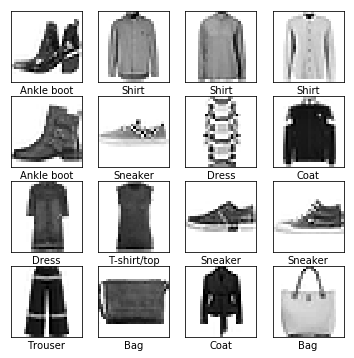

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Build a Model

<img src="http://mlclass.epizy.com/lab0_images_notebook/nn.png" width="400px"><br>

#### What is a DNN?

It is a neural network composed by many layers and consequently it has a deeper structure.

#### How many layers?

It depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.

#### Why add non-linearity?
<br>
<img src="http://mlclass.epizy.com/lab0_images_notebook/non-linearity.png" width="700px"><br>

#### Which activation functions?

There exists different choices, one of the most used is Relu but it depends on the data and on the network architecture.
<br><br>
<img src="http://mlclass.epizy.com/lab0_images_notebook/activation.png" width="600px"><br>


In [0]:
# Network Parameters
num_classes = 10 # Fashion-MNIST classes

#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [0]:

units = 128

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units, 
                                    activation='relu', 
                                    use_bias=True))
model.add(tf.keras.layers.Dense(units, 
                                    activation='relu', 
                                    use_bias=True))
model.add(tf.keras.layers.Dense(units, 
                                    activation='relu', 
                                    use_bias=True))
model.add(tf.keras.layers.Dense(num_classes, 
                                    activation='softmax', 
                                    use_bias=True))
          
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [0]:
# https://keras.io/layers/core/
#model = # --fill here-- # 

###  Model parameters
There are many parameters to choose from: the Optimizer, the Loss Function and the Metrics to use.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm; loss functions are used to tell the model how the weights should be updated.<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The update rules of the weights are determined by the **Optimizer**.<br>
The performance and update speed may heavily vary from optimizer to optimizer; in choosing an optimizer what's important to consider is the network depth, the type of layers and the type of data.<br>
The gifs below give an idea on how different Optimizers work.<br>

<img src="http://mlclass.epizy.com/lab0_images_notebook/optimizer.gif" width="500px" align="left">
<img src="http://mlclass.epizy.com/lab0_images_notebook/optimizer1.gif" width="360px" align="right">



#### Configures the model for training

In [0]:
# Optimizers    https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = tf.keras.optimizers.Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = tf.keras.optimizers.Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = tf.keras.optimizers.Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = tf.keras.optimizers.Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = tf.keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses    https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics    https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

In [0]:
# Compile the model
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

### Train the model 
The batch size is a number of samples processed before the model is updated.<br>
The number of epochs is the number of complete passes through the training dataset.

In [0]:
batch_size = 128
epochs = 50
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/sample - loss: 0.5586 - acc: 0.8027 - val_loss: 0.4163 - val_acc: 0.8492
Epoch 2/50
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3891 - acc: 0.8597 - val_loss: 0.3758 - val_acc: 0.8608
Epoch 3/50
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3465 - acc: 0.8739 - val_loss: 0.3459 - val_acc: 0.8717
Epoch 4/50
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3186 - acc: 0.8831 - val_loss: 0.3441 - val_acc: 0.8743
Epoch 5/50
48000/48000 [==============================] - 2s 38us/sample - loss: 0.3016 - acc: 0.8898 - val_loss: 0.3504 - val_acc: 0.8763
Epoch 6/50
48000/48000 [==============================] - 2s 37us/sample - loss: 0.2879 - acc: 0.8930 - val_loss: 0.3188 - val_acc: 0.8870
Epoch 7/50
48000/48000 [==============================] - 2s 38us/sample - loss: 0.2722 - acc: 0.8991 - val_loss: 0.

### Training history visualization



In [0]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [0]:
plot_history(history)

**What could you notice in the loss graph training the model over large number of epochs (50 is sufficient)?**


### Evaluate the model


In [0]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy.**
What do you expect? which is faster?

## 0.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).<br>
How to improve generalization of our model on unseen data?<br>
There exists different methods, the most used are:
    1. Add weight regularization
    2. Dropout
    3. Early stopping

### 0.3.1 Add weight regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".<br>
This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.<br> This cost comes in two flavors:
* L1 regularization
* L2 regularization

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

In [0]:
# Build the model
# hint: see kernel_regularizer parameter in the keras layers
model = # --fill here-- #


# Compile the model
# --fill here-- #


# Train the model
epochs = # --fill here-- # 
history = # --fill here-- # 


plot_history(history)

# Evaluate
_, train_acc = # --fill here-- # 
_, test_acc = # --fill here-- # 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### 0.3.2 Dropout
Dropout (http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) is one of the most effective and most commonly used regularization techniques for neural networks.<br>
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>
<img src="http://mlclass.epizy.com/lab0_images_notebook/dropout.png" width="600px"><br>
The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [0]:
# Build the model
model = # --fill here-- #

# Compile the model
# --fill here-- #

# Train
epochs =  # --fill here-- # 
history = # --fill here-- # 


plot_history(history)

# Evaluate
_, train_acc = # --fill here-- # 
_, test_acc = # --fill here-- # 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### 0.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>
<img src="http://mlclass.epizy.com/lab0_images_notebook/earlystopping.pbm" width="400px"><br>


In [0]:
# early stopping https://keras.io/callbacks/
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)

In [0]:
# Build the model
model = # --fill here-- # 

# Compile the model
# --fill here-- #


# Train
# hint: check at the callbacks parameter of the fit() function
epochs = # --fill here-- # 
history = # --fill here-- # 

# This may generate warnings related to saving the state of the optimizer.

plot_history(history)

# Evaluate
_, train_acc = # --fill here-- # 
_, test_acc = # --fill here-- # 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [0]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

checkpoint_path = "output/cp.ckpt"

model.load_weights(checkpoint_path)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))